
The most simple linear regression without regularization

In [9]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
reload(helper)
reload(stats)
get_daily_pred


<function helper.get_daily_pred(file_name, product, signal_list, coef, strat, HEAD_PATH)>

In [10]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16

In [11]:
product_list = ["IF", "IH", "IC", "T", "TF"]

In [12]:
period = 4096

In [13]:
import os
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
all_dates = np.array(all_dates)
n_days = len(all_dates)
n_days
## 1092

1092

In [14]:
import dask
from dask import compute, delayed
import sklearn.preprocessing

In [25]:
os.makedirs(HEAD_PATH+"/all signal", exist_ok=True)
dire_signal_list = ["trade.imb", "total.trade.imb", "nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["", "range", "std", "volume.open.ratio", "trend.index"]
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
signal_list = [signal+".4096" for signal in all_signal_list]
np.append(signal_list, ["ret.4096", "ret.4096.001", "ret.4096.002"])
n_signal = len(signal_list)

In [26]:
train_sample = all_dates<"2018"
test_sample = all_dates>"2018"
date_str = [n[0:8] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

- let's begin with week 8

In [67]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
#y_signal = "ret."+str(period)+".002"





In [40]:
product = product_list[0]
train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
y_signal = "ret.4096.004"

In [47]:
coef_list=dict([])
y_signal = "ret."+str(period)
for product in product_list[0:3]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    y_std = np.std(y_train)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef
    
# IF
# [-0.         -0.00096642  0.         -0.         -0.         -0.
#  -0.          0.         -0.         -0.         -0.          0.
#   0.00115256  0.         -0.         -0.          0.          0.
#  -0.         -0.00022247  0.          0.         -0.         -0.
#  -0.          0.         -0.         -0.         -0.          0.
#  -0.         -0.         -0.         -0.1628261   0.         -0.
#  -0.         -0.          0.01665425  0.          0.          0.
#   0.          0.          0.        ]
# IH
# [-0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
#  -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.
#  -0. -0. -0.  0. -0.  0. -0.  0. -0.]
# IC
# [ 2.79450142e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  7.95739585e-02  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -4.55564374e-04
#  -1.35510491e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -6.99160360e-03 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -3.52135377e-03  0.00000000e+00  6.29118674e-02
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00]

IF
[-0.         -0.00096642  0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.00115256  0.         -0.         -0.          0.          0.
 -0.         -0.00022247  0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.1628261   0.         -0.
 -0.         -0.          0.01665425  0.          0.          0.
  0.          0.          0.        ]
IH
[-0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.
 -0. -0. -0.  0. -0.  0. -0.  0. -0.]
IC
[ 2.79450142e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  7.95739585e-02  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -4.55564374e-04
 -1.35510491e-06 -0.00000000e+00 -0.00000000e+00 -0.00

- it seems the result is ok

In [48]:
coef_list=dict([])
y_signal = "ret."+str(period)+".004"
for product in product_list[0:3]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    y_std = np.std(y_train)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# IF
# [-0.         -0.00085136  0.         -0.         -0.         -0.
#  -0.          0.          0.         -0.         -0.          0.
#   0.00094878  0.         -0.         -0.          0.          0.
#  -0.         -0.00020652  0.          0.         -0.         -0.
#  -0.          0.         -0.         -0.         -0.          0.
#   0.         -0.         -0.         -0.          0.         -0.
#  -0.         -0.          0.00765008  0.          0.          0.
#   0.          0.          0.        ]
# IH
# [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -4.82777068e-20 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00]
# IC
# [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00  1.82786373e-02  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.78848278e-04
#  -0.00000000e+00 -2.44612367e-06 -2.71706565e-04 -4.77856980e-05
#  -0.00000000e+00 -5.59753746e-03 -0.00000000e+00  3.84372852e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  1.50745351e-02 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.88628809e-02
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00]


IF
[-0.         -0.00085136  0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.00094878  0.         -0.         -0.          0.          0.
 -0.         -0.00020652  0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.          0.00765008  0.          0.          0.
  0.          0.          0.        ]
IH
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.82777068e-20 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+

In [49]:
SAVE_PATH = "e:/intern"

In [50]:
save(coef_list, SAVE_PATH+"/coef.ret.4096.004.pkl")

- we can see that the result is not good

- it's still not good. So we cannot use lasso model

In [51]:
def par_get_signal_mat(file_name, product, signal_list, HEAD_PATH, SAVE_PATH):
    data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file_name)
    signal_mat = functools.reduce(functools.partial(get_signal_mat, product=product, file_name=file_name, HEAD_PATH=SAVE_PATH), signal_list, None)
    save(signal_mat, SAVE_PATH+"/signal mat pkl/"+product+"/"+file_name)

In [52]:
def par_get_daily_pred(file_name, product, coef, strat, HEAD_PATH):
    signal_mat = load(HEAD_PATH+"/signal mat pkl/"+product+"/"+file_name)
    S = np.dot(signal_mat.transpose(),coef)
    save(S, HEAD_PATH+"/tmp pkl/"+product+"/"+strat+"/"+file_name)      



- now let's try lasso regression

In [53]:
strat = "lasso.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [54]:
coef_list = load(SAVE_PATH+"/coef.ret.4096.004.pkl")

In [27]:
## good are MA,ZC

In [55]:
for product in ["IF", "IC"]:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [72]:
os.makedirs("e:/intern"+"/signal mat pkl", exist_ok=True)
for product in product_list:
    os.makedirs("e:/intern"+"/signal mat pkl/"+product, exist_ok=True)

In [74]:
%%time
#for product in ["IF","IC"]:
for product in ["IH"]:
    print(product)
    parLapply(CORE_NUM, all_dates, par_get_signal_mat, product=product, signal_list=signal_list, HEAD_PATH=HEAD_PATH, SAVE_PATH=SAVE_PATH)
    
# IF
# IC
# Wall time: 31min 42s




IH
Wall time: 14min 5s


In [59]:
%%time
for product in ["IF","IC"]:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# IF
# IC
# Wall time: 12min 6s


IF
IC
Wall time: 12min 6s


In [60]:
%%time
for product in ["IF","IC"]:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")

## Wall time: 32.1 s


Wall time: 32.1 s


In [63]:
%%time
for product in ["IF","IC"]:
    spread = product_info[product]["spread"]
    evaluate_signal("lasso.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread*1.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# Wall time: 3min 41s


reverse=1
reverse=1
Wall time: 3min 41s


IF train sharpe  0.6474985360778703 test sharpe  0.6894928922767609
IC train sharpe  0.2506268046173083 test sharpe  -0.6988084905894827
train sharpe:  0.5451733058079553 test sharpe:  -0.23175453098720702


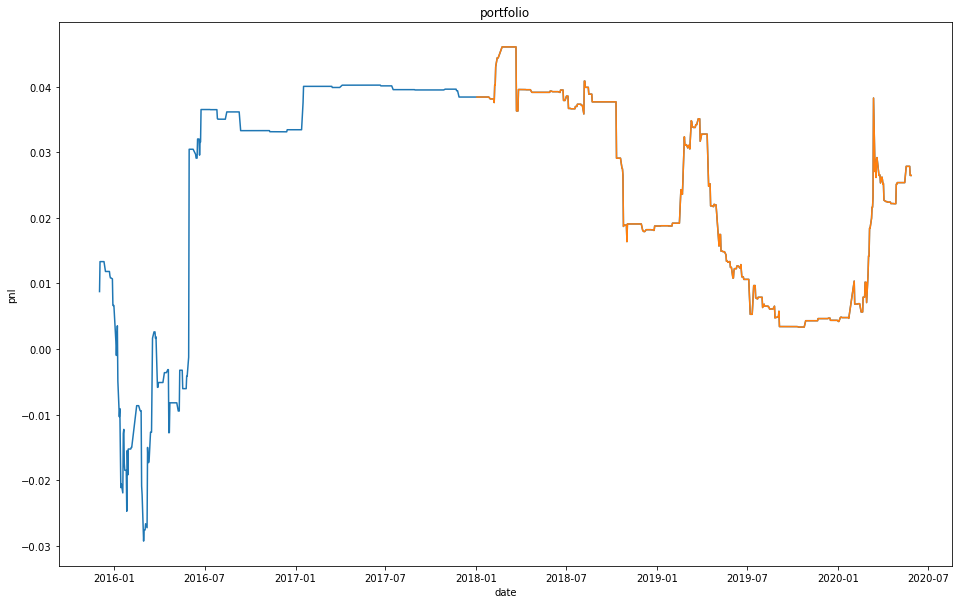

In [64]:
i = 0
strat = "lasso.004.4096"
test_all_pnl = np.zeros([sum(test_sample), 4])
train_all_pnl = np.zeros([sum(train_sample), 4])
min_pnl = 10
min_num = 10
for product in ["IF","IC"]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# IF train sharpe  0.6474985360778703 test sharpe  0.6894928922767609
# IC train sharpe  0.2506268046173083 test sharpe  -0.6988084905894827
# train sharpe:  0.5451733058079553 test sharpe:  -0.23175453098720702




- The result is not good
- Now we go to ridge

In [68]:
coef_list=dict([])
y_signal= "ret." + str(period)+".004"
for product in product_list[0:3]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = RidgeCV(fit_intercept=False, cv=5).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# IF
# [-4.73012272e-03 -3.94525592e-03 -4.58967561e-02 -3.16602343e-02
#   1.90575126e-03 -6.00875478e-04 -4.88238949e-02  5.21036021e-04
#  -1.00774965e-03  3.54145595e-04  1.72313258e-04 -8.84883221e-04
#   5.90067185e-03  2.00150493e-04  6.71851466e-06 -2.06170730e-03
#  -6.12473624e-05  4.02101843e-05 -2.31777980e-03 -9.02990241e-04
#   7.78987643e-03 -9.70072065e-03 -1.28441742e-03  4.51844578e-04
#  -8.37123369e-03  1.44888030e-04 -7.32245514e-05  7.19038559e-02
#   1.05533016e-02  1.54182092e-01 -2.17012134e-01  1.76695241e-02
#  -4.87374578e-03 -1.21810015e+00 -2.52252314e-03  3.41700655e-04
#   1.01930910e-02 -4.11421337e-03  3.45151659e-02 -7.63510065e-03
#  -1.68879015e-03 -3.68019879e-04  7.58581458e-02 -8.45420304e-05
#   1.70435748e-03]
# IH
# [ 3.10628399e-02 -2.07102390e-02  6.75283943e-02  6.25192477e-03
#  -6.57625983e-03  4.28291980e-04 -1.61361749e-01  2.50459930e-03
#   2.97542205e-04 -2.18981531e-03  6.04830375e-04  5.56847732e-04
#   6.02907880e-03 -1.49373574e-04  1.19687453e-05 -3.15043869e-03
#  -4.27708936e-05 -6.46160248e-05 -1.27860800e-03  1.35212278e-03
#   1.26526121e-04 -2.96277009e-02  8.97448114e-04  3.69831876e-04
#  -1.11144256e-02 -1.80425677e-04  3.60805530e-05  4.88261818e-04
#   4.05567077e-02 -4.99100418e-01  1.36052005e-01  4.67994735e-03
#  -1.20079167e-02  1.99182878e+00  7.39125950e-03  3.80271999e-03
#   2.25595003e-02 -6.49257507e-03  1.90518916e-02 -6.71682313e-03
#   5.45630742e-03  3.17856604e-04 -5.60142472e-02 -2.26434151e-03
#  -8.98887374e-04]
# IC
# [ 1.57286976e-02  2.34427969e-03 -6.46901692e-02 -1.11062939e-01
#   3.52314824e-03 -4.91545038e-04  5.70930668e-01 -2.93364835e-04
#  -1.66699895e-03  2.40249364e-04 -1.37825348e-04  8.22145697e-04
#   3.00491952e-03 -4.28051371e-05  1.23430657e-05 -2.07374817e-03
#  -3.66086920e-05 -1.06142966e-05  4.55602274e-04 -3.59455833e-05
#  -1.14718257e-03 -2.28975352e-02 -4.92935164e-04  2.10167325e-04
#   3.68001910e-03  7.87950417e-06  8.03022741e-05 -1.39845052e-01
#   7.52437159e-03 -1.90273233e-01  1.05918813e+00  1.57449376e-02
#  -1.53863122e-02 -1.22514154e+00  1.59629311e-02  7.07754111e-03
#   1.24414917e-03 -9.45394728e-03  1.01417628e-01  9.54555555e-02
#   1.99825478e-03 -1.15735153e-03 -1.69898443e-01 -6.25052592e-04
#   7.44017125e-05]


IF
[-4.73012272e-03 -3.94525592e-03 -4.58967561e-02 -3.16602343e-02
  1.90575126e-03 -6.00875478e-04 -4.88238949e-02  5.21036021e-04
 -1.00774965e-03  3.54145595e-04  1.72313258e-04 -8.84883221e-04
  5.90067185e-03  2.00150493e-04  6.71851466e-06 -2.06170730e-03
 -6.12473624e-05  4.02101843e-05 -2.31777980e-03 -9.02990241e-04
  7.78987643e-03 -9.70072065e-03 -1.28441742e-03  4.51844578e-04
 -8.37123369e-03  1.44888030e-04 -7.32245514e-05  7.19038559e-02
  1.05533016e-02  1.54182092e-01 -2.17012134e-01  1.76695241e-02
 -4.87374578e-03 -1.21810015e+00 -2.52252314e-03  3.41700655e-04
  1.01930910e-02 -4.11421337e-03  3.45151659e-02 -7.63510065e-03
 -1.68879015e-03 -3.68019879e-04  7.58581458e-02 -8.45420304e-05
  1.70435748e-03]
IH
[ 3.10628399e-02 -2.07102390e-02  6.75283943e-02  6.25192477e-03
 -6.57625983e-03  4.28291980e-04 -1.61361749e-01  2.50459930e-03
  2.97542205e-04 -2.18981531e-03  6.04830375e-04  5.56847732e-04
  6.02907880e-03 -1.49373574e-04  1.19687453e-05 -3.15043869e-03
 

d:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [69]:
save(coef_list, SAVE_PATH+"/coef.ridge.004.pkl")

In [70]:
strat = "ridge.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [75]:
%%time
for product in product_list[0:3]:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# IH
# IC
# Wall time: 9min 31s


IH
IC
Wall time: 9min 31s


In [76]:
%%time
for product in product_list[0:3]:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")
    
# Wall time: 1min 22s

Wall time: 1min 22s


In [1]:
%%time
SAVE_PATH = "e:/intern"
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    
    evaluate_signal("ridge.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread*1.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# reverse=1
# reverse=1
# reverse=1
# Wall time: 12min 24s


NameError: name 'product_list' is not defined

IF train sharpe  1.1256008516593825 test sharpe  0.3279416615240679
IH train sharpe  0.329997631526421 test sharpe  -0.20150813062206632
IC train sharpe  1.0575468135255637 test sharpe  -0.2268920156552622
train sharpe:  1.386340803967788 test sharpe:  -0.10058636245181198


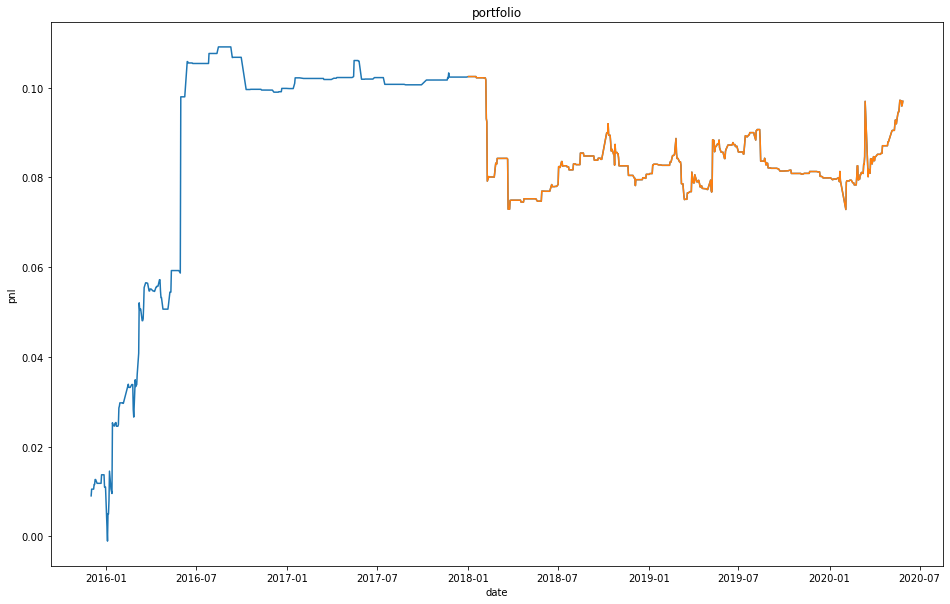

In [78]:
i = 0
strat = "ridge.004.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list[0:3]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# IF train sharpe  1.1256008516593825 test sharpe  0.3279416615240679
# IH train sharpe  0.329997631526421 test sharpe  -0.20150813062206632
# IC train sharpe  1.0575468135255637 test sharpe  -0.2268920156552622
# train sharpe:  1.386340803967788 test sharpe:  -0.10058636245181198




In [79]:
from sklearn.linear_model import ElasticNetCV

In [80]:
strat = "elastic.004."+str(period)

In [81]:
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [93]:
train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
x_train = train_mat.iloc[:, :n_signal].values
y_train = train_mat.loc[:, y_signal].values


In [96]:
coef_list=dict([])
y_signal= "ret." + str(period)+".004"
for product in product_list[0:3]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = ElasticNetCV(n_alphas=100, l1_ratio=0.5, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

coef_list=dict([])

y_signal= "ret." + str(period)+".004"

for product in product_list[0:3]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = ElasticNetCV(n_alphas=100, l1_ratio=0.5, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef


# IF
# [-0.         -0.00100694  0.         -0.         -0.         -0.
#  -0.          0.         -0.         -0.         -0.          0.
#   0.00109761  0.         -0.         -0.          0.          0.
#  -0.         -0.00027825  0.          0.         -0.         -0.
#  -0.          0.         -0.         -0.         -0.          0.
#  -0.         -0.         -0.         -0.01047768 -0.         -0.
#  -0.         -0.          0.01090034  0.          0.          0.
#   0.          0.          0.        ]
# IH
# [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -1.88386764e-19 -0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00]
# IC
# [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#   0.00000000e+00  4.68279571e-06  2.46748244e-02  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.61936948e-04
#  -0.00000000e+00 -2.22598926e-06 -2.91589979e-04 -4.42223599e-05
#  -0.00000000e+00 -5.34365144e-03 -0.00000000e+00  3.17510713e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.67594274e-02
#   0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00]


IF
[-0.         -0.00100694  0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
  0.00109761  0.         -0.         -0.          0.          0.
 -0.         -0.00027825  0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.01047768 -0.         -0.
 -0.         -0.          0.01090034  0.          0.          0.
  0.          0.          0.        ]
IH
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.88386764e-19 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+

In [97]:
save(coef_list, SAVE_PATH+"/coef.elastic.004.pkl")

In [98]:
strat = "elastic.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [99]:
%%time
for product in ["IF", "IC"]:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")
    
# IF
# IC
# Wall time: 10min 8s



IF
IC
Wall time: 10min 8s


In [101]:
%%time
for product in ["IF", "IC"]:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")
    
# Wall time: 1min 20s


Wall time: 18.4 s


In [102]:
%%time
SAVE_PATH = "e:/intern"
for product in ["IF", "IC"]:
    spread = product_info[product]["spread"]
    evaluate_signal("elastic.004", all_dates, product, 2, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2018", tranct=1.1e-4, 
                    max_spread=spread*1.1, tranct_ratio=True, atr_filter=20, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# Wall time: 3min 34s



reverse=1
reverse=1
Wall time: 3min 34s


IF train sharpe  0.5300121887950476 test sharpe  0.4903980675034343
IC train sharpe  0.2089555968655139 test sharpe  -0.6706049344406237
train sharpe:  0.3798357211148903 test sharpe:  -0.2939600000751591


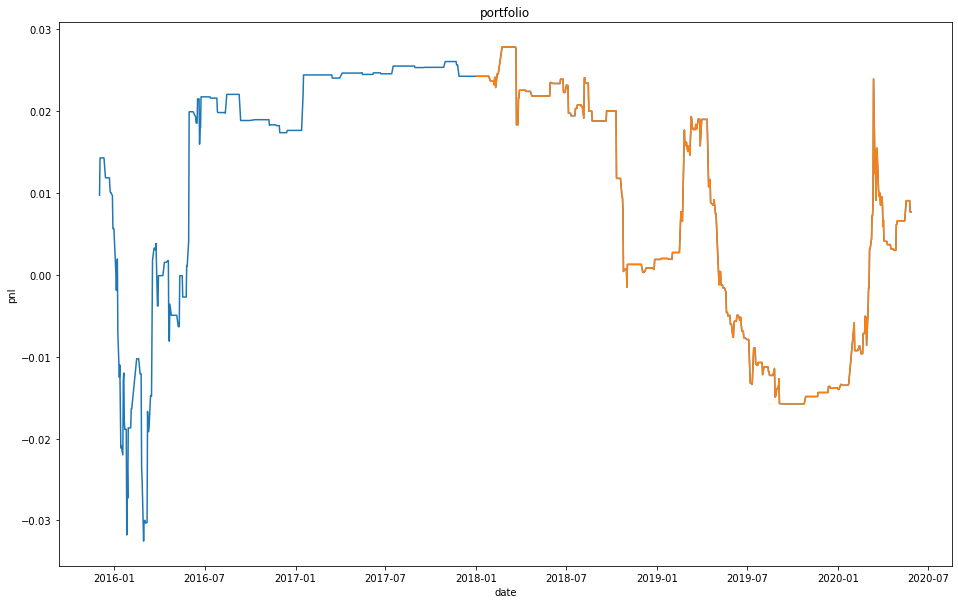

In [103]:
i = 0
strat = "elastic.004.4096"
test_all_pnl = np.zeros([sum(test_sample), 4])
train_all_pnl = np.zeros([sum(train_sample), 4])
min_pnl = 2
min_num = 10
for product in ["IF","IC"]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))   

# IF train sharpe  0.5300121887950476 test sharpe  0.4903980675034343
# IC train sharpe  0.2089555968655139 test sharpe  -0.6706049344406237
# train sharpe:  0.3798357211148903 test sharpe:  -0.2939600000751591


- output to txt file

In [126]:
os.makedirs("d:/intern/input", exist_ok=True)
np.set_printoptions(suppress=True)

In [127]:
for product in product_list:
    file_name = "d:/intern/input/"+product+".signal.txt"
    fo = open(file_name, "w")
    fo.writelines("signal coef\n")
    chosen_signal = coef_list[product]!=0
    for i in np.where(chosen_signal)[0]:
        fo.writelines(signal_list[i]+" "+str(coef_list[product][i])+"\n")
    fo.close()